<a href="https://colab.research.google.com/github/Raymond-Christopher/Profiling_Tools/blob/main/Assigment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5262-50 Assignment 3

---

# Author: Christopher Raymond
# TASK I: Refine your data dictionary

This part of the notebook demonstrates refining the

## Background
According to [WalletHub](https://wallethub.com/edu/cc/number-of-credit-cards/25532) there are 600 million credit card accounts in the US as of Q3 2024. With a total of 1.166 trillion dollars in credit card balance according to [LendingTree](https://www.lendingtree.com/credit-cards/study/credit-card-debt-statistics/). This growing demand for American spending puts a greater pressure on finacial institutions to ensure that they are giving out credit cards and credit limits in fiduary ways to ensure that they are contiously making a profit without a pending risk of large scale defaults.

### Importance of Predictive Analytics in Credit Managment
In order to address the challenges around credit cards banks are increaseingly relying on data driven solutions to aid in deciding on how to issue credit. By leveraging the customer data and using predicitive tools to align the issuance of credit with the risk of a customers profile banks are able to make more accurate estimates on how they are deciding a customers likelyhood of repaying their debits. Machine learning offers banks a way to scale their credit assessments by allowing them to process large volumes of request and infomation quickly accurately.

### Data Overview
This data set is a collection of individuals credit card debt and their demographic and finacial infomation. The data contains infomation such as;

* **Credit limits** - The credit limit (CL) each indivdial has,
* **Demographics** - Infomation such as age, gender, marital status, and education level,
* **Payment History** - Past payment history,
* **Billing and Payment Amounts** - Monthly statments

### Research Gap and Challenges
The use of traditonal credit scores such as Experian, Transuion, Equifax fail to give real time changes in a customers behavior. If a customer is struggling and is likely to default on their repayments, traditional methods will not refelect this for 30-60 days at best. This project aims to address these gapbs by developing a scalable and transparent credit risk framework that will give credit instiutions much greater visibility and the ability to react quickly when necessary.

##Project Description

The goal of this project is to use customer data to accurately predict a customer's likelihood of defaulting on their upcoming month's payment. This model will enable financial institutions to estimate their income more accurately and make informed decisions, such as increasing or reducing a customer's credit limit based on their behavior.

### Methods
This project will use machine learning approach and various classification algorithms. The high level approach will include

1.   **Data Processing** - Cleaning, normalizing and handling missing data values
2.   **Feature Engineering** - Using the data to identify key predictors i.e. payment history, credit utilization, and demographics
3.   ** Model Training and Validation**

### Data Resources
The dataset contains the following anonomous customer data:

*   **Demographic Data**: Age, gender, marital status, education level (This data set is intentially excluding data that could cause bias such as religion, race, and sexual orientaion)
*   **Finacial Infomation**: Credit limits and billing statments
*   **Behavior Data**: Payment history and Historical Payment history,

### Anticipated Outcomes
*    A model that is able to predict the a customers likelyhood to default with a high degree of percision.
*   Insight into factors that are driving credit risk
*   Real time credit risk managment opposed to slower traditional methods
*   A reduction in defaults leading to more economic stability for the institution

In [1]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

We have two options here: 1) load the raw data from its online repository into a pandas dataframe or 2) load the dataset from seaborn since it's one of the available examples in seaborn - it is auto-loaded as a pandas dataframe

**Data dictionary**
- Limit_Bal: The CC limit
- Sex: Gender of the user (1 = Male, 2 = Female).
- Education: Education level (1 = Graduate School, 2 = University, 3 = High School, 4+ = Others).
- Marraiage: Marital status (1 = Married, 2 = Single, 3 = Others).
- Age: Age of the user (years).
- Pay_0: Repayment status in month 1 (-1 = Paid on time, 1 = Delay of 1 month, etc.).
- Pay_2: Repayment status in month 2 (same encoding as PAY_0).
- Pay_3: Repayment status in month 3
- Pay_4: Repayment status in month 4
- Pay_5: Repayment status in month 5
- Pay_6: Repayment status in month 6
- Bill_Amt1: Bill statement amount in month 1
- Bill_Amt2: Bill statement amount in month 2
- Bill_Amt3: Bill statement amount in month 3
- Bill_Amt4: Bill statement amount in month 4
- Bill_Amt5: Bill statement amount in month 5
- Bill_Amt6: Bill statement amount in month 6
- Pay_Amt1: Payment amount in month 1
- Pay_Amt2: Payment amount in month 2
- Pay_Amt3: Payment amount in month 3
- Pay_Amt4: Payment amount in month 4
- Pay_Amt5: Payment amount in month 5
- Pay_Amt6: Payment amount in month 6

In [13]:
import pandas as pd
import seaborn as sns

customer = pd.read_csv('cleaned_data.csv')

print("\n🔹 Dataset Overview:")
print(customer.info())

print("\n🔹 Summary Statistics:")
print(customer.describe(include='all'))


print("\n🔹 Missing Values:")
print(customer.isnull().sum())

print("\n🔹 Random Sample Row:")
display(customer.sample(1))

print("\n🔹 Last 5 Rows:")
display(customer.tail())

print("\n🔹 First 5 Rows:")
display(customer.head())



🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29993 entries, 0 to 29992
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29993 non-null  int64
 1   SEX                         29993 non-null  int64
 2   EDUCATION                   29993 non-null  int64
 3   MARRIAGE                    29993 non-null  int64
 4   AGE                         29993 non-null  int64
 5   PAY_0                       29993 non-null  int64
 6   PAY_2                       29993 non-null  int64
 7   PAY_3                       29993 non-null  int64
 8   PAY_4                       29993 non-null  int64
 9   PAY_5                       29993 non-null  int64
 10  PAY_6                       29993 non-null  int64
 11  BILL_AMT1                   29993 non-null  int64
 12  BILL_AMT2                   29993 non-null  int64
 13  BILL_AMT3                   29993 non-nu

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15377,140000,2,2,1,48,0,0,0,0,0,...,46503,48418,49277,1996,3000,3000,3000,1790,1965,0



🔹 Last 5 Rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29988,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29989,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29990,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29991,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29992,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1



🔹 First 5 Rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# TASK II: Basic EDA

In this section I will be focusing on answering the following questions.

- 1. How does the default payment next month relate to other features i.e Age, Sex, and Limit balance?
- 2. What are the repayment patterns (e.g., PAY_0, PAY_2, etc.) over time?
- 3. Are there any patterns or clusters within different age groups, credit limits, and payment amounts?
- 4. How does education level and marital status influence the default rate?


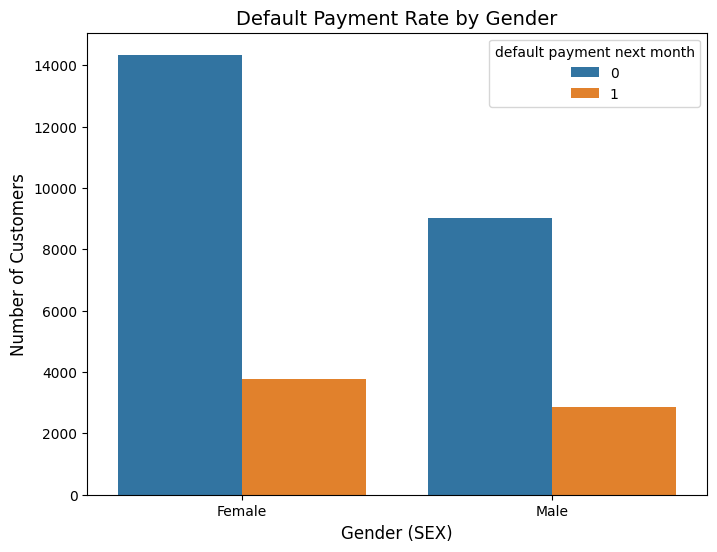

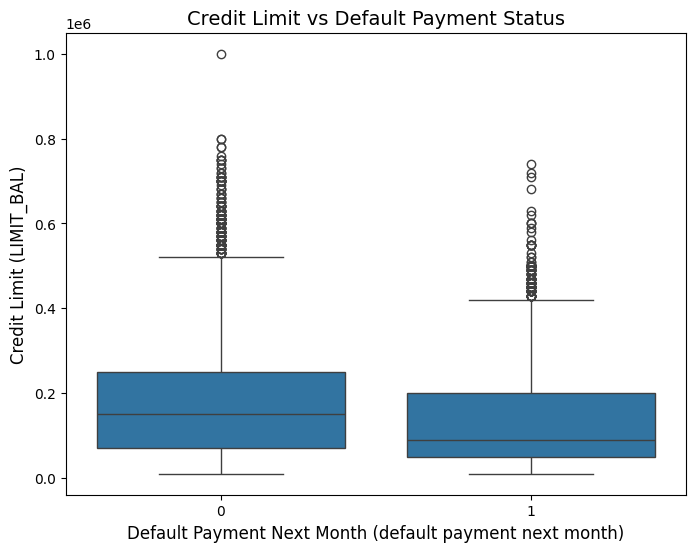

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

customer['SEX'] = customer['SEX'].map({1: 'Male', 2: 'Female'})


plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', hue='default payment next month', data=customer)

plt.xlabel('Gender (SEX)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Default Payment Rate by Gender', fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=customer)

plt.xlabel('Default Payment Next Month (default payment next month)', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.title('Credit Limit vs Default Payment Status', fontsize=14)
plt.show()


### How does the default payment next month relate to other features i.e Age, Sex, and Limit balance?

Using the graph above (**Default Payment Rate by Gender**), we observe that the dataset contains a significantly larger number of female customers compared to male customers. The default rate for women is approximately 24%, while the default rate for men is around 33%. This results in an 11% difference, which suggests there is likely a statistical difference between the default rates of male and female customers.

---

Using the graph above (Credit Limit vs Default Payment Status), we observe that the non-defaulting subset tends to have higher credit limits. This can likely be explained by their longer credit histories and the ability to build up higher credit limits over time, which reflects a higher level of trustworthiness in managing credit. Customers who do not default may have demonstrated a track record of responsible credit use, which allows them to qualify for higher limits compared to those who default.

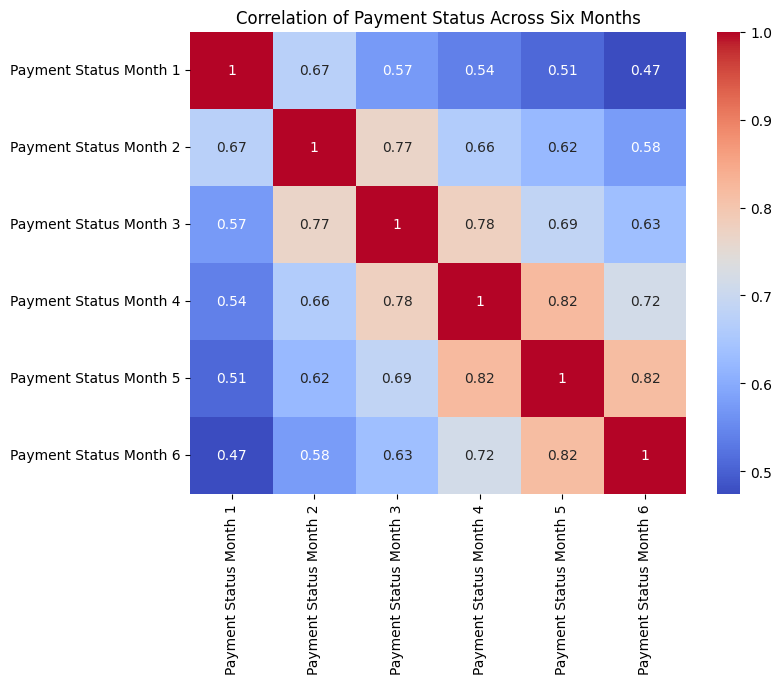

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(customer[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(),
            annot=True, cmap='coolwarm',
            xticklabels=['Payment Status Month 1', 'Payment Status Month 2', 'Payment Status Month 3',
                         'Payment Status Month 4', 'Payment Status Month 5', 'Payment Status Month 6'],
            yticklabels=['Payment Status Month 1', 'Payment Status Month 2', 'Payment Status Month 3',
                         'Payment Status Month 4', 'Payment Status Month 5', 'Payment Status Month 6'])

plt.title('Correlation of Payment Status Across Six Months')
plt.show()


### What are the repayment patterns (e.g., PAY_0, PAY_2, etc.) over time?

After analyzing the Correlation of Payment Status Across Six Months, we observe a strong correlation between past and future payments. For example, looking at Payment Status Month 5 on the y-axis, we see a correlation of 0.82 with both Month 4 and Month 6. This suggests that a customer's payment behavior in Month 5 is highly similar to their behavior in Months 4 and 6.
However, as time progresses, this correlation weakens, indicating that payment behavior becomes less predictable over longer periods. Based on this dataset, customer behavior can reliably be predicted within approximately three-month intervals. To improve these predictions, we would need to analyze a larger dataset spanning a more extended period.

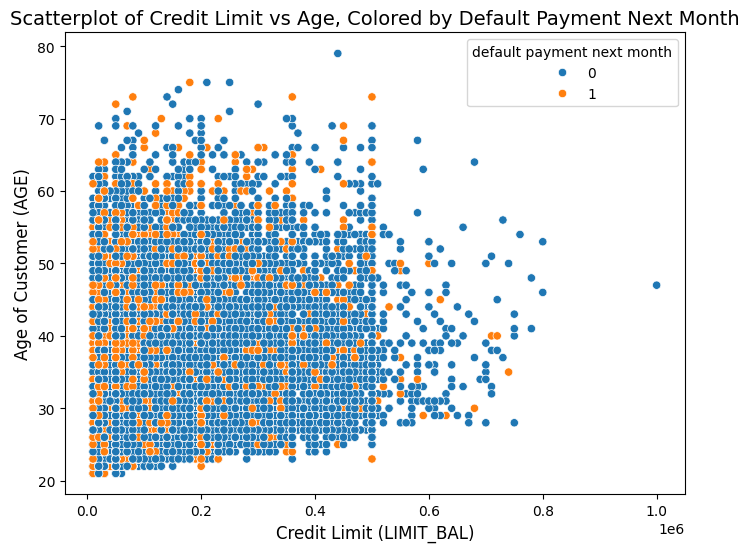

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LIMIT_BAL', y='AGE', hue='default payment next month', data=customer)

plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Age of Customer (AGE)', fontsize=12)
plt.title('Scatterplot of Credit Limit vs Age, Colored by Default Payment Next Month', fontsize=14)
plt.show()


### Are there any patterns or clusters within different age groups, credit limits, and payment amounts?

After analyzing the Scatterplot of Credit Limit vs. Age, we observe that the majority of defaults occur within the lower credit limits, specifically in the 0.0 to 0.2 range. This suggests a strong correlation between lower credit limits and a higher likelihood of default.
Additionally, we notice that older individuals with higher credit limits have significantly lower default rates, indicating a higher level of credit trust among this group. This trend suggests that financial institutions may extend higher limits to older individuals based on their proven creditworthiness and repayment history.

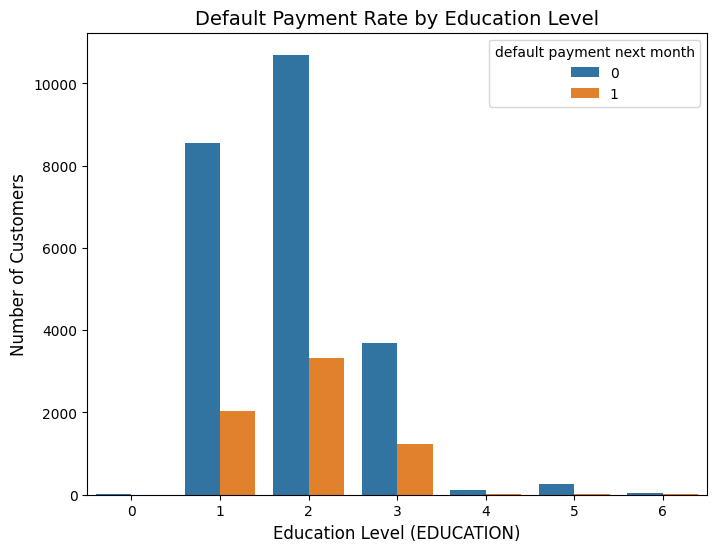

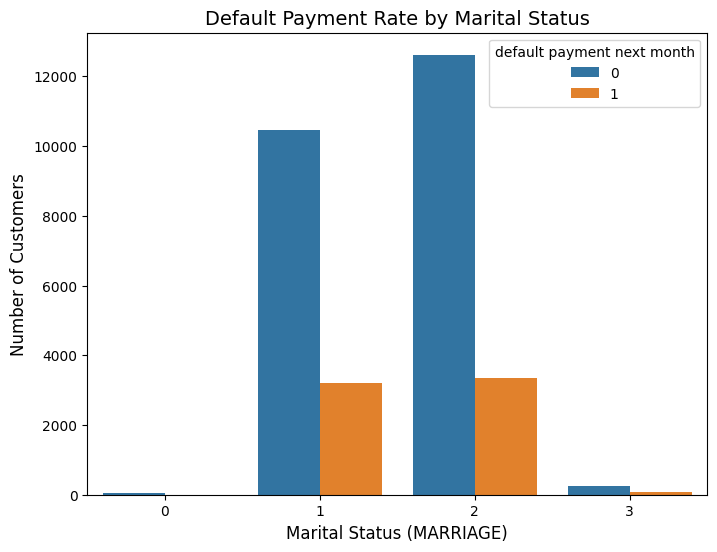

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='EDUCATION', hue='default payment next month', data=customer)

plt.xlabel('Education Level (EDUCATION)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Default Payment Rate by Education Level', fontsize=14)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='MARRIAGE', hue='default payment next month', data=customer)


plt.xlabel('Marital Status (MARRIAGE)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Default Payment Rate by Marital Status', fontsize=14)
plt.show()


### How does education level and marital status influence the default rate?

The graph shows a heavy skew toward individuals with higher-level degrees, with limited data available for those with less than a high school education. However, across all education levels from high school and above, there is approximately a 25% chance of default.
For education categories 4, 5, and 6, the data is insufficient to draw clear conclusions about its impact on creditworthiness. To improve the model, removing or combining these categories may help create a more reliable and interpretable analysis.

---

Comparing 1 and 2 in the graph (Default Payment Rate by Marital Status) we can see that married couples have a much higher default rate when compared to single individuals.

#Feature engineering

Much of the data in the data set is continuous. One feature that I beleive would be useful would be creating categorical bins for easier modeling. Some of the data that can be expermented with is:

> Age:
>> 1. Young 18 - 30
>> 2. Middle age 31 - 50
>> 3. Elderly 51 - 70

> Credit Limit  
>> 1. Low limit 1k - 20k
>> 2. Medium limit 21k - 100k
>> 3. High limit 101k+

---

Additionally, using the ratio of **balance to credit limit**  
$\frac{\text{BILL_AMT}}{\text{LIMIT_BAL}}$  
and the **payment amount to credit limit**  
$\frac{\text{PAY_AMT}}{\text{LIMIT_BAL}}$  
would provide a more **relative and proportional measure** of a person's financial situation.

---

To improve the model's accuracy and reduce potential bias, we could make the following changes:

- Remove education levels outside of categories 1, 2, and 3, as the data for other categories is too limited to allow meaningful analysis. Keeping them may introduce bias into the model.
- Remove relationship data outside of categories 1 and 2, since the sample size for other categories is insufficient for reliable conclusions.




## Train Test Split

For the **train-test split**, we need to ensure that the data is **balanced overall** and take into consideration the various **classes in the distribution** to ensure **unbiased training**.  

The planned split is as follows:  
- **70%** of the data will be randomly selected for **training**.  
- **20%** of the data will be used for **testing and evaluation** during model development.  
- The remaining **10%** will be kept as a **final unbiased evaluation set** to assess the model's real-world performance after refinement.  


## Establish an Inital Pipeline

To ensure **efficient data preprocessing** and **model training**, we plan to incorporate the following transformers into our pipeline:  

- **Scaler/Normalizer:** Standardizes numerical features to ensure consistent feature scaling.  
- **Column Transformer:** Separates categorical and numerical features to apply different preprocessing steps.  
- **One-Hot Encoder:** Encodes categorical variables into numerical format for machine learning models that do not handle categorical data directly.  
- **Feature Engineering Transformer:** Will handle the new features such-as: **balance-to-credit-limit ratio** and **payment-to-credit-limit ratio** for improved financial assessment.  

This pipeline will be refined based on exploratory data analysis (EDA) results and model performance.  


## Model Fitting and Evalutation

The follwing are the fatures that I beleive will have the greatest importance in the model.

1. Credit Limit and Payment History
> - Given the strong relationship between payment history shown in `Correlation of Payment Status Across Six Months`. Using the customers past behaviour will be a key indicator on how they will pay in the future.

2. Age and Education
> - Given that younger individuals have less financial experince and education direcly ties to financial literacy, I beleive there will be a moderate corrolation between these two fields. I do not expect there to be a strong bias placed on this because you can be you and have finacial literacy or have a lower education level and be finacially wise.